In [1]:
#newsapi.ai key: d9052625-a43b-4f63-b861-c1c8abe115bc
#newsAPI key: c3645cc0bc8044bb97ddf2951e63c9fd
#!pip install requests_html

NewsAPI HTTP Status Codes
200	Success. Everything worked as expected.
204	Information not available. Request succeeded, but the requested information is not available.
400	Bad request. The request was unacceptable, most likely due to invalid or missing parameter.
401	User's limit reached. The user reached the limit of the tokens in his account. The requests are rejected.
403	Forbidden. The user's IP or account is disabled, or if all the tokens have been used. Check the error message for more details.
500	Internal error. Internal error occured while processing the request.
503	Service unavailable. The service is currently not available.

In [2]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.feature_extraction.text import CountVectorizer  
 
#for text vectorization
#print(sklearn.__version__)

#from requests_html import HTMLSession
#from requests_html import AsyncHTMLSession

source": {
"id": "the-washington-post",
"name": "The Washington Post"
}

source": {
"id": "cbs-news",
"name": "CBS News"

"source": {
"id": "espn",
"name": "ESPN"

"source": {
"id": "associated-press",
"name": "Associated Press"
    
-"source": {
"id": "cnn",
"name": "CNN"
    
"source": {
"id": null,
"name": "BBC News"
    
source": {
"id": "fox-news",
"name": "Fox News"
    
    "source": {
"id": "abc-news",
"name": "ABC News"

In [6]:
url1 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=1&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)

url2 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=2&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)
url3 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=3&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)
url4 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=4&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)
url5 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=5&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)
url6 = ('https://newsapi.org/v2/everything?'
       'q=(transgender)AND(youth+OR+minor+OR+minors+OR+children+OR+child)&'
        'page=6&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'
       #'pageSize=100&'
       #'language=en&'
       #'sources=cbs-news,cnn,fox-news,abc-news,the-washington-post&'
       'apiKey=c3645cc0bc8044bb97ddf2951e63c9fd'
)


In [7]:
r1 = requests.get(url1)
print(r1)
jsontxt1 = r1.json()

r2 = requests.get(url2)
print(r2)
jsontxt2 = r2.json()

r3 = requests.get(url3)
print(r3)
jsontxt3 = r3.json()

r4 = requests.get(url4)
jsontxt4 = r4.json()
print(r4)

r5 = requests.get(url5)
jsontxt5 = r5.json()
print(r5)

r6 = requests.get(url6)
jsontxt6 = r6.json()
print(r6)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [426]>


In [11]:
cd /home/jovyan/Text_Mining/Naive Bayes_Decision Trees_SVMs/NN

/home/jovyan/Text_Mining/Naive Bayes_Decision Trees_SVMs/NN


In [4]:
## Create a new csv file to save the headlines
filename='TransgenderQuery_jsontxt.csv'

In [5]:
#erases file content if you need to overwrite during troubleshooting
#MyFILE=open(filename,"r+")
#MyFILE.truncate(0)

In [13]:
MyFILE=open(filename,"w")
### Place the column names in - write to the first row
WriteThis="Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [15]:
## Open the file for append

MyFILE=open(filename, "a")
for items in jsontxt1['articles']:
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)]).lower()
    
    WriteThis=str(Headline) + "\n"
    
    MyFILE.write(WriteThis)

for items in jsontxt2['articles']:
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)]).lower()
    
    WriteThis=str(Headline) + "\n"
    
    MyFILE.write(WriteThis)

for items in jsontxt3['articles']:
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)]).lower()
    
    WriteThis=str(Headline) + "\n"
    
    MyFILE.write(WriteThis)

for items in jsontxt4['articles']:
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)]).lower()
    
    WriteThis=str(Headline) + "\n"
    
    MyFILE.write(WriteThis)

for items in jsontxt5['articles']:
    
    Headline=items["description"]
    if Headline == "[Removed]":
        Headline = "None"
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    Headline = ' '.join([wd for wd in Headline.split() if (len(wd)>3 & len(wd)<14)]).lower()
    #Headline = ' '.join([wd for wd in Headline.split() if (wd not in ["transgender).lower()
    
    WriteThis=str(Headline) + "\n"
    
    MyFILE.write(WriteThis)

## CLOSE THE FILE
MyFILE.close()

In [5]:
## Read to DF
newsAPI_df=pd.read_csv(filename, on_bad_lines = 'warn')


In [6]:
newsAPI_df.head()

,Headline
0,lawsuit been filed against ohio house bill whi...
1,victoria atkins criticises culture secrecy gen...
2,andrea long says unpopular part loud
3,benedict attacked their oklahoma high school f...
4,vatican doctrine office issued infinite dignit...


In [18]:

## REMOVE any rows with NaN in them
print(len(newsAPI_df))
newsAPI_df = newsAPI_df.dropna()
print(len(newsAPI_df))

500
500


In [2]:
!pip install WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv
import re

  Using cached wordcloud-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)


In [20]:
text1 = newsAPI_df['Headline'].to_string(index=False).lower()
text1 = text1.replace('\n', " ")


In [21]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

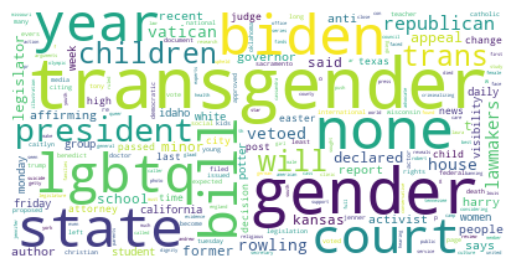

In [22]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
X = newsAPI_df["Headline"]

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
labellist = []
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Example text
for text in X:
    # Get the sentiment scores
    scores = sid.polarity_scores(text)

    # Assign sentiment label based on the compound score
    if scores['compound'] >= 0.05:
        sentiment_label = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    labellist.append(sentiment_label)
    #print("Text:", text)
    #print("Sentiment Label:", sentiment_label)
print(labellist)

['Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Positiv

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
newsAPI_df["LABEL"] = labellist
newsAPI_df.head()

,Headline,LABEL
0,lawsuit been filed against ohio house bill whi...,Positive
1,victoria atkins criticises culture secrecy gen...,Positive
2,andrea long says unpopular part loud,Neutral
3,benedict attacked their oklahoma high school f...,Negative
4,vatican doctrine office issued infinite dignit...,Positive


In [12]:
newsAPI_df.to_csv("SentimentLabeledHeadlines.csv")

In [3]:
df = pd.read_csv("SentimentLabeledHeadlines.csv")

In [4]:
df = df.drop_duplicates(subset= ["Headline"])
df = df[df['Headline'] != "none"]


In [5]:
df.to_csv("SLH_clean.csv")

In [9]:
def get_ngrams(text, ngram_from=1, ngram_to=3, n=None, max_features=1000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [21]:
X=df["Headline"]
label=df["LABEL"]

In [10]:

unigrams = get_ngrams(X, ngram_from=1, ngram_to=1, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
print(unigrams_df.head())

bigrams = get_ngrams(X, ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
print(bigrams_df.head())

trigrams = get_ngrams(X, ngram_from=3, ngram_to=3, n=15)
trigrams = pd.DataFrame(trigrams)
trigrams.columns=["Trigram", "Frequency"]
print(trigrams.head())

       Unigram  Frequency
0  transgender        153
1       gender        108
2        lgbtq         66
3         post         57
4        trans         55
                   Bigram  Frequency
0        gender affirming         39
1  transgender visibility         32
2          affirming care         27
3         president biden         24
4            harry potter         20
                 Trigram  Frequency
0  gender affirming care         27
1  affirming care minors          9
2  daniel radcliffe emma          8
3  radcliffe emma watson          8
4     harry potter stars          7


In [11]:
MyCountV = CountVectorizer(input="content", lowercase=True, stop_words = "english", ngram_range = (1, 2), 
                           max_features = 1000
                          )
MyDTM = MyCountV.fit_transform(X)  # create a sparse matrix

In [12]:
vocab = MyCountV.get_feature_names_out()  # change to a list

MyDTM = MyDTM.toarray()  # convert to a regular array

MyDTM_DF=pd.DataFrame(MyDTM,columns=vocab)

In [13]:
MyDTM_DF

,abortion,abortion euthanasia,abortion providers,abuse,access,according,accused,action,activist,activists,...,world,year,year study,year transgender,years,york,young,young people,youth,youths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
450,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
#print(len(stoplist))
#"against" might be useful for sentiment analysis

In [133]:
# Defining a list of values to remove from the original list
#remove_list = ['bill', 'cry', 'he', 'him', 'her', 'hers', 'him', 'his', 'they', 'their', 'them', 'serious', 'who', 'whoever', 'whom']
 
# Creating a new list with all values from the original list
# that are not in the remove list
#res = [x for x in stoplist if x not in remove_list]
 
# Updating the original list to be the new list of values
#stoplist[:] = res
 
# Printing the updated original list
#print(len(stoplist))

In [134]:
#MyDTM_DF.loc['Total'] = MyDTM_DF.sum()

In [135]:
#print(MyDTM_DF.loc['Total'])

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import os
import re
import shutil

from nltk.stem import WordNetLemmatizer 
LEMMER = WordNetLemmatizer() 

import nltk
nltk.download('wordnet')

from nltk.stem.porter import PorterStemmer
STEMMER=PorterStemmer()


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:

def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

print(MY_LEMMER("Hiking is loved by hikers and hikes!! 1234"))


['hiking', 'is', 'loved', 'by', 'hiker', 'and', 'hike']


In [24]:


MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        ngram_range = (1, 2),
                        lowercase = True,
                        #max_features=10
                        )


Vect_LEM = MyVect_LEM.fit_transform(X)
ColumnNames_lem=MyVect_LEM.get_feature_names_out()
DF_LEM=pd.DataFrame(Vect_LEM.toarray(),columns=ColumnNames_lem)

DF_LEM["LABEL"] = label
print(DF_LEM)

     aaron  aaron rodgers  abbott  abbott called  ability  ability mental  \
0        1              1       0              0        0               0   
1        0              0       0              0        0               0   
2        0              0       0              0        0               0   
3        0              0       0              0        0               0   
4        0              0       0              0        0               0   
..     ...            ...     ...            ...      ...             ...   
449      0              0       0              0        0               0   
450      0              0       0              0        0               0   
451      0              0       0              0        0               0   
452      0              0       0              0        0               0   
453      0              0       0              0        0               0   

     abortifacient  abortifacient concern  abortion  abortion activist  ...

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [25]:
DF_LEM.to_csv("DF_LEM.csv")

In [26]:
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        ngram_range = (1, 2),
                        lowercase = True,
                        max_features=1000
                        )


Vect_LEM = MyVect_LEM.fit_transform(X)
ColumnNames_lem=MyVect_LEM.get_feature_names_out()
DF_LEM=pd.DataFrame(Vect_LEM.toarray(),columns=ColumnNames_lem)
DF_LEM["LABEL"] = label
print(DF_LEM)

     abortion  abortion euthanasia  abortion provider  abuse  access  \
0           0                    0                  0      0       0   
1           0                    0                  0      0       0   
2           0                    0                  0      0       0   
3           0                    0                  0      0       0   
4           0                    0                  0      0       0   
..        ...                  ...                ...    ...     ...   
449         0                    0                  0      0       0   
450         0                    0                  0      0       0   
451         0                    0                  0      0       0   
452         0                    0                  0      0       0   
453         0                    0                  0      0       0   

     according  accused  action  activist  actor  ...  worker  world  year  \
0            0        0       0         0      0  ...    

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [27]:
DF_LEM.to_csv("DF_LEM1000.csv")